In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics,model_selection
from sklearn.linear_model import LinearRegression

In [8]:
data=pd.read_csv('kc_house_data.csv')
train=pd.read_csv('wk3_kc_house_train_data.csv')
test=pd.read_csv('wk3_kc_house_test_data.csv')
valid=pd.read_csv('wk3_kc_house_valid_data.csv')
set1=pd.read_csv('wk3_kc_house_set_1_data.csv')
set2=pd.read_csv('wk3_kc_house_set_2_data.csv')
set3=pd.read_csv('wk3_kc_house_set_3_data.csv')
set4=pd.read_csv('wk3_kc_house_set_4_data.csv')

In [87]:
def polynomial_frame(feat, deg):
    df=pd.DataFrame()
    df['power_1']=feat
    if(deg>1):
        for power in range(2,deg+1):
            name='power_'+str(power)
            df[name]=feat**power
    return df

In [88]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [89]:
# sort by sqft and if same,then by price
data=data.sort_values(['sqft_living','price'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [90]:
# 1 deg polynomial feat of sqft
poly1_data = polynomial_frame(data['sqft_living'],1)
poly1_data['price']=data['price']
poly1_data.head()

,power_1,price
19452,290,142000.0
15381,370,276000.0
860,380,245000.0
18379,384,265000.0
4868,390,228000.0


In [91]:
# Linear regression
reg1=LinearRegression()
x1=poly1_data.loc[:,['power_1']]
y1=poly1_data.loc[:,['price']]
reg1.fit(x1,y1)
print(reg1.coef_)
print(reg1.intercept_)

[[280.6235679]]
[-43580.74309447]


In [92]:
pred1=reg1.predict(x1)

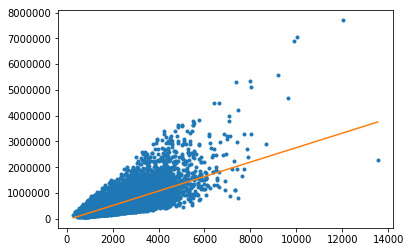

In [93]:
plt.plot(x1,y1,'.',x1,pred1,'-')
plt.show()

In [94]:
# 2 deg polynomial feat of sqft
poly2_data = polynomial_frame(data['sqft_living'],2)
poly2_data['price']=data['price']
poly2_data.head()

,power_1,power_2,price
19452,290,84100,142000.0
15381,370,136900,276000.0
860,380,144400,245000.0
18379,384,147456,265000.0
4868,390,152100,228000.0


In [95]:
# Linear regression
reg2=LinearRegression()
x2=poly2_data.loc[:,['power_1','power_2']]
y2=poly2_data.loc[:,['price']]
reg2.fit(x2,y2)
print(reg2.coef_)
print(reg2.intercept_)

[[6.79940947e+01 3.85812609e-02]]
[199222.27930549]


In [96]:
pred2=reg2.predict(x2)

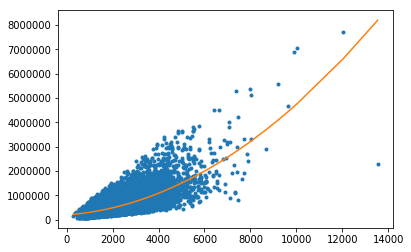

In [97]:
plt.plot(x2['power_1'],y2,'.',x2['power_1'],pred2,'-')
plt.show()

In [98]:
# 3 deg polynomial feat of sqft
poly3_data = polynomial_frame(data['sqft_living'],3)
poly3_data['price']=data['price']
poly3_data.head()

,power_1,power_2,power_3,price
19452,290,84100,24389000,142000.0
15381,370,136900,50653000,276000.0
860,380,144400,54872000,245000.0
18379,384,147456,56623104,265000.0
4868,390,152100,59319000,228000.0


In [99]:
# Linear regression
reg3=LinearRegression()
x3=poly3_data.loc[:,['power_1','power_2','power_3']]
y3=poly3_data.loc[:,['price']]
reg3.fit(x3,y3)
print(reg3.coef_)
print(reg3.intercept_)

[[-9.01819864e+01  8.70465089e-02 -3.84055260e-06]]
[336819.74822121]


In [100]:
pred3=reg3.predict(x3)

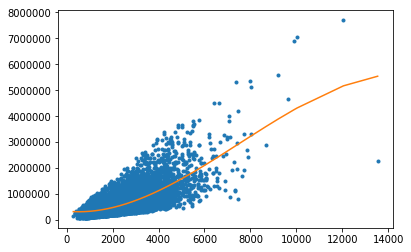

In [101]:
plt.plot(x3['power_1'],y3,'.',x3['power_1'],pred3,'-')
plt.show()

In [102]:
# 15 deg polynomial feat of sqft
poly15_data = polynomial_frame(data['sqft_living'],15)
poly15_data['price']=data['price']
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,-5315590925028654848,8005133933292429824,-2800912632598854656,-607924210447579136,8169419707297566720,7948473681471741952,-785641586888785920,-6475131313233297408,142000.0
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,759807991618519296,4427795793208865280,-3475779072869940224,5233828197790730240,-391694556932730880,2646966524565987328,1700178182809075712,1876629133233258496,276000.0
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,-7942643919429238784,7061338705255727104,8530817309291315200,-4916379442181308416,-5103036584232484864,-2245774268841328640,-4843994769065508864,3956395126061793280,245000.0
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,-6845471433603153920,-9223372036854775808,0,0,0,0,0,0,265000.0
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,245347910523003136,3451964735423464960,-346070565645933568,-5840312085947230208,-8772192453144932352,-8507403090256568320,2526728067657646080,7746510479875735552,228000.0


In [109]:
# Linear regression
reg15=LinearRegression()
x15=poly15_data.iloc[:,:-1]
y15=poly15_data.loc[:,['price']]
reg15.fit(x15,y15)
print(reg15.coef_)
print(reg15.intercept_)

[[ 1.71168068e-05  4.21744511e-02  4.60390766e-06 -4.52621788e-10
  -2.28180335e-14 -2.19978034e-16 -5.23475998e-16  3.53710233e-16
  -2.03742921e-16 -2.66640678e-16  1.03339888e-16  7.25319004e-16
   4.31646849e-16 -4.01761092e-16  4.80891588e-17]]
[279955.71850603]


In [110]:
pred15=reg15.predict(x15)

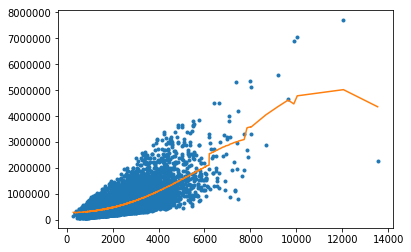

In [111]:
plt.plot(x15['power_1'],y15,'.',x15['power_1'],pred15,'-')
plt.show()

In [171]:
## set1
# 15 deg polynomial feat of sqft
set1_poly15_data = polynomial_frame(set1['sqft_living'],15)
set1_poly15_data['price']=set1['price']
set1_x=set1_poly15_data.iloc[:,:-1]
set1_y=set1_poly15_data.loc[:,['price']]

In [173]:
## set2
# 15 deg polynomial feat of sqft
set2_poly15_data = polynomial_frame(set2['sqft_living'],15)
set2_poly15_data['price']=set2['price']
set2_x=set2_poly15_data.iloc[:,:-1]
set2_y=set2_poly15_data.loc[:,['price']]

In [174]:
## set3
# 15 deg polynomial feat of sqft
set3_poly15_data = polynomial_frame(set3['sqft_living'],15)
set3_poly15_data['price']=set3['price']
set3_x=set3_poly15_data.iloc[:,:-1]
set3_y=set3_poly15_data.loc[:,['price']]

In [175]:
## set4
# 15 deg polynomial feat of sqft
set4_poly15_data = polynomial_frame(set4['sqft_living'],15)
set4_poly15_data['price']=set4['price']
set4_x=set4_poly15_data.iloc[:,:-1]
set4_y=set4_poly15_data.loc[:,['price']]

In [176]:
# Linear regression
model1=LinearRegression()
model1.fit(set1_x,set1_y)
print(model1.coef_)
print(model1.intercept_)

[[ 1.76465570e-05  4.45411488e-02  4.13661127e-06 -4.48047730e-10
  -2.26415636e-14  9.47776069e-17 -7.16721519e-16  2.96537617e-16
  -1.73358528e-16 -1.27779846e-15  1.25167532e-16  5.57248802e-16
   2.07555800e-16 -3.22162649e-16 -3.76775605e-16]]
[274622.34664846]


In [177]:
# Linear regression
model2=LinearRegression()
model2.fit(set2_x,set2_y)
print(model2.coef_)
print(model2.intercept_)

[[ 3.01032105e-05  6.13674780e-02 -2.50352414e-06  1.10951666e-10
  -1.77576004e-14  8.10927198e-16 -3.66237744e-16 -2.99793943e-16
  -6.06915744e-16  3.77138800e-16  7.09391481e-16  7.63202526e-16
   1.03013671e-15 -4.68999478e-16  1.32895389e-15]]
[255755.68714909]


In [178]:
# Linear regression
model3=LinearRegression()
model3.fit(set3_x,set3_y)
print(model3.coef_)
print(model3.intercept_)

[[ 3.05432187e-05  6.76809518e-02 -5.33065238e-06  4.60008835e-10
  -1.32875407e-14 -1.74887829e-16 -3.81531333e-16  5.60900764e-16
   4.46605816e-16  5.33703005e-16 -2.14963500e-16  1.14265835e-15
   6.13520928e-16  3.27057039e-16 -2.49251841e-16]]
[251924.85041412]


In [179]:
# Linear regression
model4=LinearRegression()
model4.fit(set4_x,set4_y)
print(model4.coef_)
print(model4.intercept_)

[[ 2.92919406e-05  5.47717463e-02 -1.43998898e-06  7.39200236e-11
   3.46686540e-14 -1.23460329e-15 -3.99075890e-16  8.93979247e-16
  -4.93742778e-16 -5.39751027e-16  2.67529920e-16  4.01091283e-16
   2.86797199e-16 -1.03553104e-15 -3.31834125e-16]]
[269724.65584524]


In [180]:
## predictions on 4 sets
set1_pred15=model1.predict(set1_x)
set2_pred15=model2.predict(set2_x)
set3_pred15=model3.predict(set3_x)
set4_pred15=model4.predict(set4_x)

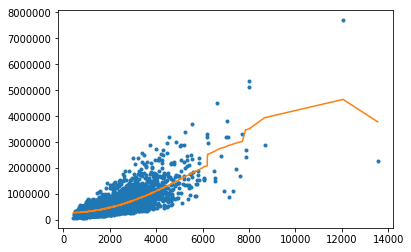

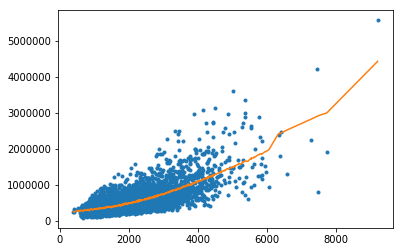

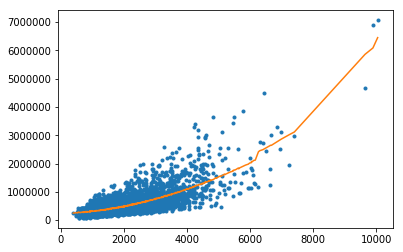

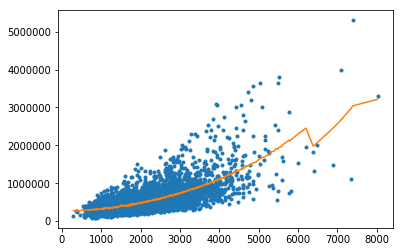

In [181]:
plt.plot(set1_x['power_1'],set1_y,'.',set1_x['power_1'],set1_pred15,'-')
plt.show()
plt.plot(set2_x['power_1'],set2_y,'.',set2_x['power_1'],set2_pred15,'-')
plt.show()
plt.plot(set3_x['power_1'],set3_y,'.',set3_x['power_1'],set3_pred15,'-')
plt.show()
plt.plot(set4_x['power_1'],set4_y,'.',set4_x['power_1'],set4_pred15,'-')
plt.show()

In [202]:
## RSS
def error(y,y_pred):
    y=np.array(y)
    y_pred=np.array(y_pred)
    err=np.sum( (y-y_pred)**2 )
    return err

In [203]:
### train test valid
err_list=[]
for i in range(1,16):
    # fit on train
    poly_data = polynomial_frame(train['sqft_living'],i)
    poly_data['price']=train['price']
    reg=LinearRegression()
    x=poly_data.iloc[:,:-1]
    y=poly_data.loc[:,['price']]
    reg.fit(x,y)
    
    #predict on valid
    val_data = polynomial_frame(valid['sqft_living'],i)
    val_data['price']=valid['price']
    vx=val_data.iloc[:,:-1]
    vy=val_data.loc[:,['price']]
    y_pred=reg.predict(vx)
    
    # RSS 
    err=error(vy,y_pred)
    err_list.append(err)

In [204]:
for e in err_list:
    print(e)

629097886299585.8
623955062706518.1
625820280251530.8
629987335647053.1
623373631170253.4
623252426460508.5
623163786697903.9
623407590555017.8
623336791262094.6
623451321254633.9
623557887390329.5
623282158225152.5
623230250005456.5
623304085547162.4
623407020802225.8


In [205]:
# index of minimum rss
err=np.array(err_list)
ind=err.argmin()
print(ind)   # ind=6 => degree=7  ## right ans=>6 check

6


In [206]:
# fit on train
poly_data = polynomial_frame(train['sqft_living'],7)
poly_data['price']=train['price']
reg=LinearRegression()
x=poly_data.iloc[:,:-1]
y=poly_data.loc[:,['price']]
reg.fit(x,y)
    
#predict on test
t_data = polynomial_frame(test['sqft_living'],7)
t_data['price']=test['price']
tx=t_data.iloc[:,:-1]
ty=t_data.loc[:,['price']]
y_pred=reg.predict(tx)
    
# RSS 
err=error(ty,y_pred)
print(err)

136759307140676.89


In [208]:
train.shape

(9761, 21)

In [209]:
test.shape

(2217, 21)

In [212]:
set1.shape

(5404, 21)

In [215]:
set2.shape

(5398, 21)

In [216]:
set3.shape

(5409, 21)

In [217]:
set4.shape

(5402, 21)

In [218]:
valid.shape

(9635, 21)

In [219]:
data.shape

(21613, 21)